In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split


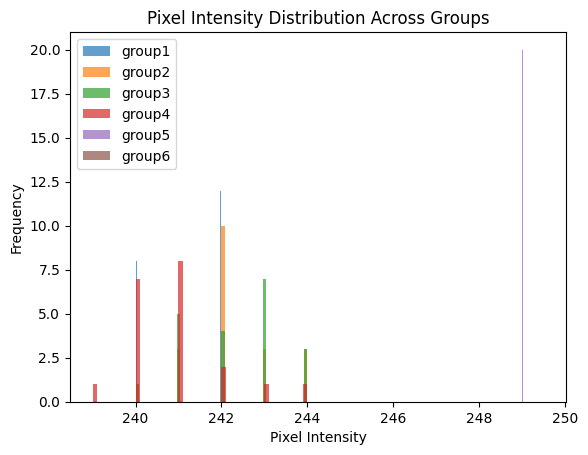

{'group1': {'max_intensity': 242, 'min_intensity': 240}, 'group2': {'max_intensity': 244, 'min_intensity': 240}, 'group3': {'max_intensity': 244, 'min_intensity': 240}, 'group4': {'max_intensity': 244, 'min_intensity': 239}, 'group5': {'max_intensity': 249, 'min_intensity': 249}, 'group6': {'max_intensity': 242, 'min_intensity': 241}}


In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

dataset_path = r"D:\DIP project\datset\IR_flame_dataset\IR_dataset\train_set"

group_stats = {}

for group in os.listdir(dataset_path):
    group_path = os.path.join(dataset_path, group)
    if os.path.isdir(group_path):
        intensities = []
        for img_name in os.listdir(group_path):
            img_path = os.path.join(group_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                intensities.append(np.max(img))  # Maximum intensity in the image
        group_stats[group] = {"max_intensity": np.max(intensities), "min_intensity": np.min(intensities)}
        plt.hist(intensities, bins=50, alpha=0.7, label=group)

plt.title("Pixel Intensity Distribution Across Groups")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.show()

print(group_stats)


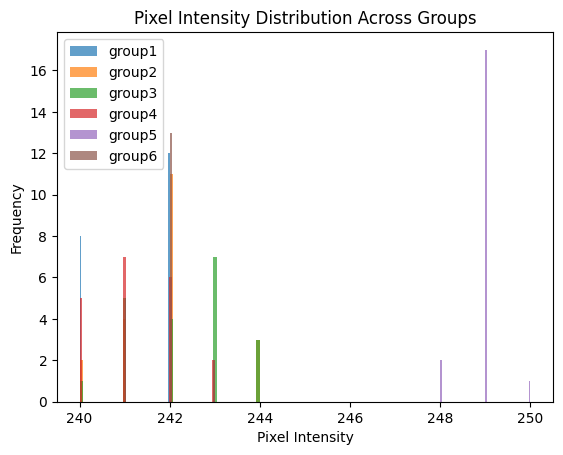

{'group1': {'max_intensity': 242, 'min_intensity': 240}, 'group2': {'max_intensity': 244, 'min_intensity': 240}, 'group3': {'max_intensity': 244, 'min_intensity': 240}, 'group4': {'max_intensity': 243, 'min_intensity': 240}, 'group5': {'max_intensity': 250, 'min_intensity': 248}, 'group6': {'max_intensity': 243, 'min_intensity': 241}}


In [3]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

dataset_path = r"D:\DIP project\datset\IR_flame_dataset\IR_dataset\vali_set"

group_stats = {}

for group in os.listdir(dataset_path):
    group_path = os.path.join(dataset_path, group)
    if os.path.isdir(group_path):
        intensities = []
        for img_name in os.listdir(group_path):
            img_path = os.path.join(group_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                intensities.append(np.max(img))  # Maximum intensity in the image
        group_stats[group] = {"max_intensity": np.max(intensities), "min_intensity": np.min(intensities)}
        plt.hist(intensities, bins=50, alpha=0.7, label=group)

plt.title("Pixel Intensity Distribution Across Groups")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.show()

print(group_stats)


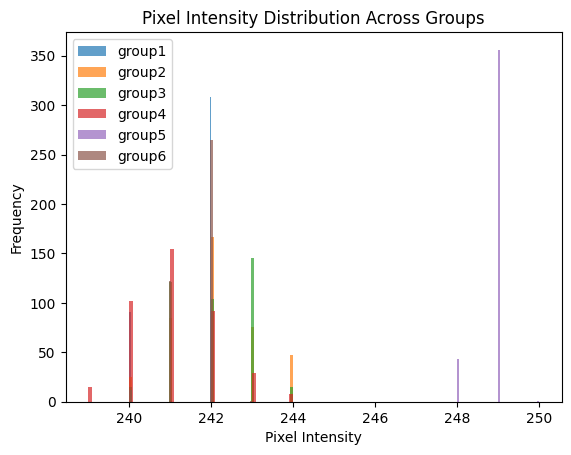

{'group1': {'max_intensity': 242, 'min_intensity': 240}, 'group2': {'max_intensity': 244, 'min_intensity': 240}, 'group3': {'max_intensity': 244, 'min_intensity': 240}, 'group4': {'max_intensity': 244, 'min_intensity': 239}, 'group5': {'max_intensity': 250, 'min_intensity': 248}, 'group6': {'max_intensity': 243, 'min_intensity': 240}}


In [4]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

dataset_path = r"D:\DIP project\datset\IR_flame_dataset\IR_dataset\test_set"

group_stats = {}

for group in os.listdir(dataset_path):
    group_path = os.path.join(dataset_path, group)
    if os.path.isdir(group_path):
        intensities = []
        for img_name in os.listdir(group_path):
            img_path = os.path.join(group_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                intensities.append(np.max(img))  # Maximum intensity in the image
        group_stats[group] = {"max_intensity": np.max(intensities), "min_intensity": np.min(intensities)}
        plt.hist(intensities, bins=50, alpha=0.7, label=group)

plt.title("Pixel Intensity Distribution Across Groups")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.show()

print(group_stats)


In [5]:
import os
import cv2
import numpy as np

# Define thresholds
def assign_label_by_intensity(image,min_threshold=242,max_threshold=245):
    max_intensity = np.max(image)
    #print("max",max_intensity)
    if max_intensity <= min_threshold:
        return 0
    elif max_intensity<=max_threshold:
        return 1
    else:
        return 2  
    
# Re-label images
dataset_path = r"D:\DIP project\datset\IR_flame_dataset\IR_dataset\train_set"
test_path = r"D:\DIP project\datset\IR_flame_dataset\IR_dataset\test_set"
valid_path = r"D:\DIP project\datset\IR_flame_dataset\IR_dataset\vali_set"




In [6]:
def load_images(data_dir):
    images = []
    labels = []
    for group in os.listdir(dataset_path):
        group_path = os.path.join(dataset_path, group)
        if os.path.isdir(group_path):
            for img_name in os.listdir(group_path):
                img_path = os.path.join(group_path, img_name)
                image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if image is not None:
                    labels.append(assign_label_by_intensity(image))
                    image = cv2.resize(image, (128, 128)) 
                    images.append(image)
                else: 
                    print("failed")             
                
    return np.array(images), np.array(labels)

In [7]:
original_train_images, train_labels = load_images(dataset_path)


In [8]:

unique, counts = np.unique(train_labels, return_counts=True)
print(f"Class Distribution: {dict(zip(unique, counts))}")

Class Distribution: {0: 82, 1: 18, 2: 20}


In [9]:
valid_images, valid_labels = load_images(valid_path)
unique, counts = np.unique(valid_labels, return_counts=True)
print(f"Class Distribution: {dict(zip(unique, counts))}")

Class Distribution: {0: 82, 1: 18, 2: 20}


In [10]:
test_images, test_labels = load_images(test_path)
unique, counts = np.unique(test_labels, return_counts=True)
print(f"Class Distribution: {dict(zip(unique, counts))}")

Class Distribution: {0: 82, 1: 18, 2: 20}


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from collections import Counter
import numpy as np
import cv2

# Initialize augmentation generator
datagen = ImageDataGenerator(rotation_range=20, zoom_range=0.2, horizontal_flip=True)

augmented_images = []
augmented_labels = []

# Target number of samples per class (equal to the max class size before augmentation)
target_class_size = max(Counter(train_labels).values())

# Perform augmentation for all classes
for img, label in zip(original_train_images, train_labels):
    
    # Ensure the image has the shape (128, 128, 1)
    img = np.expand_dims(img, axis=-1)  # Add channel dimension (128, 128, 1)
    img = np.expand_dims(img, axis=0)   # Add batch dimension (1, 128, 128, 1)

    # Count current number of images in the class
    current_class_count = np.count_nonzero(train_labels == label)
 
    # If the current class has fewer images than the target size, augment
    if current_class_count < target_class_size:
        if label==1:
            augment_count = 70
            for _ in range(augment_count):
                augmented_img = datagen.flow(img, batch_size=1).next()[0].astype('uint8')
                augmented_images.append(augmented_img)  # Augmented image has shape (128, 128, 1)
                augmented_labels.append(label)
        else:
            augment_count = 62
            for _ in range(augment_count):
                augmented_img = datagen.flow(img, batch_size=1).next()[0].astype('uint8')
                augmented_images.append(augmented_img)  # Augmented image has shape (128, 128, 1)
                augmented_labels.append(label)
            
    else:
        augment_count = 14
        for _ in range(augment_count):
            augmented_img = datagen.flow(img, batch_size=1).next()[0].astype('uint8')
            augmented_images.append(augmented_img)  # Augmented image has shape (128, 128, 1)
            augmented_labels.append(label)

# Combine original and augmented data




# Ensure augmented images are in the correct shape (128, 128, 1)
augmented_images = np.array(augmented_images)

augmented_images = np.squeeze(augmented_images, axis=-1)
augmented_labels = np.array(augmented_labels)


# Check shapes before concatenation
print(f"Original images shape: {original_train_images.shape}")
print(f"Augmented images shape: {augmented_images.shape}")

# Combine original and augmented data
train_images = np.concatenate((original_train_images, augmented_images), axis=0)
# Convert train_labels to a NumPy array if it's not already
train_labels = np.array(train_labels)

# Combine labels correctly using np.concatenate
train_labels = np.concatenate((train_labels, augmented_labels), axis=0)


# Check the final shape of images
print(f"Final image shape: {train_images.shape}")


Original images shape: (120, 128, 128)
Augmented images shape: (3648, 128, 128)
Final image shape: (3768, 128, 128)


In [12]:
from collections import Counter

class_counts = Counter(train_labels)
print(f"Class Distribution After Augmentation: {class_counts}")

Class Distribution After Augmentation: Counter({1: 1278, 2: 1260, 0: 1230})


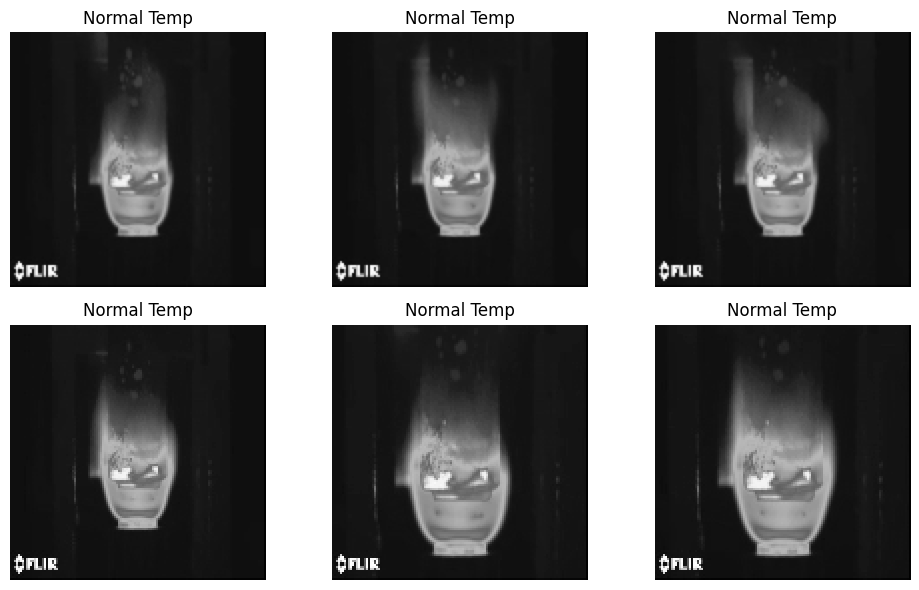

In [13]:
# Display a few samples
plt.figure(figsize=(10, 6))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title("High Temp" if train_labels[i] == 2 else "Moderate Temp" if train_labels[i] == 1 else "Normal Temp")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [14]:
print(train_images.shape)


(3768, 128, 128)


In [15]:
# Normalize images
images = np.array(train_images)
images = images / 255.0
images = images.reshape(-1, 128, 128, 1)

# Split into training, validation, and testing
# Example of datasets you already have
X_train, y_train = train_images, train_labels  # Training data
X_val, y_val = valid_images, valid_labels  # Validation data
X_test, y_test = test_images, test_labels  # Test data

# Verifying data shapes
print("Training data shape:", X_train.shape, y_train.shape)
print("Validation data shape:", X_val.shape, y_val.shape)
print("Test data shape:", X_test.shape, y_test.shape)



Training data shape: (3768, 128, 128) (3768,)
Validation data shape: (120, 128, 128) (120,)
Test data shape: (120, 128, 128) (120,)


In [16]:
unique, counts = np.unique(train_labels, return_counts=True)
print(f"Class Distribution: {dict(zip(unique, counts))}")


Class Distribution: {0: 1230, 1: 1278, 2: 1260}


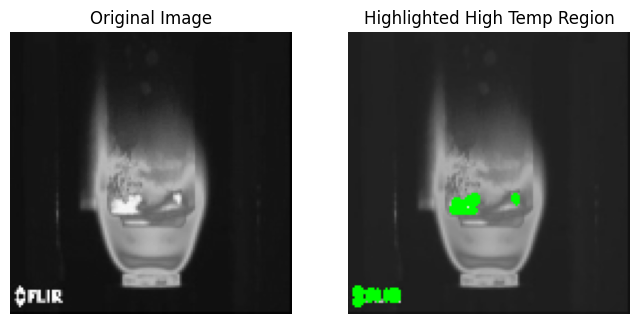

In [17]:
# Function to highlight the brightest region
'''def highlight_high_temp_region(image):
    # Threshold the image to extract the brightest region
    _, thresh = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY)
    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    output = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    # Draw contours on the image
    cv2.drawContours(output, contours, -1, (0, 255, 0), 2)
    return output'''

def highlight_high_temp_region(image):
    """
    Highlights the brightest region in a grayscale image.
    Args:
        image: A 2D NumPy array representing a grayscale image.
    Returns:
        An image with the brightest region highlighted.
    """
    # Convert the image to uint8 format if not already
    if image.dtype != np.uint8:
        image = (image * 255).astype(np.uint8)  # Ensure pixel values are in [0, 255]
    
    # Threshold the image to extract the brightest region
    _, thresh = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY)
    
    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Convert to color for highlighting
    output = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    
    # Draw contours on the image
    cv2.drawContours(output, contours, -1, (0, 255, 0), 2)
    return output


# Apply to a sample image
sample_image = images[10].reshape(128, 128) * 255  # Reshape for visualization
highlighted = highlight_high_temp_region(sample_image.astype('uint8'))

# Display original and highlighted image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(sample_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(highlighted)
plt.title("Highlighted High Temp Region")
plt.axis('off')
plt.show()


In [18]:
def extract_high_temp_features(image):
    """
    Extract features from the brightest region in the image.
    Returns features: [max_intensity, region_area, x_centroid, y_centroid]
    """
    _, thresh = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if contours:
        # Find the largest contour
        largest_contour = max(contours, key=cv2.contourArea)
        
        # Calculate features
        area = cv2.contourArea(largest_contour)
        moments = cv2.moments(largest_contour)
        if moments["m00"] != 0:
            x_centroid = moments["m10"] / moments["m00"]
            y_centroid = moments["m01"] / moments["m00"]
        else:
            x_centroid, y_centroid = 0, 0
        max_intensity = np.max(image)
    else:
        # Default values if no contour is found
        area, x_centroid, y_centroid, max_intensity = 0, 0, 0, np.max(image)
    
    return [max_intensity, area, x_centroid, y_centroid]

# Apply to all images
highlighted_features = np.array([extract_high_temp_features(img) for img in train_images])


In [19]:
from sklearn.preprocessing import StandardScaler

# Normalize and scale extracted features
scaler = StandardScaler()
highlighted_features_scaled = scaler.fit_transform(highlighted_features)

X_combined = [img.flatten() for img in train_images]
X_combined = np.hstack((X_combined, highlighted_features_scaled))
X_combined = np.array(X_combined)
X_train_combined,y_train=X_combined, train_labels


highlighted_features = np.array([extract_high_temp_features(img) for img in valid_images])
highlighted_features_scaled = scaler.fit_transform(highlighted_features)
valid_X_combined = [img.flatten() for img in valid_images]
valid_X_combined = np.hstack((valid_X_combined, highlighted_features_scaled))
valid_X_combined = np.array(valid_X_combined)
X_valid_combined,y_valid=valid_X_combined, valid_labels


highlighted_features = np.array([extract_high_temp_features(img) for img in test_images])
highlighted_features_scaled = scaler.fit_transform(highlighted_features)

test_X_combined = [img.flatten() for img in test_images]
test_X_combined = np.hstack((test_X_combined, highlighted_features_scaled))
test_X_combined = np.array(test_X_combined)
X_test_combined,y_test=test_X_combined, test_labels


In [20]:
from tensorflow.keras.layers import Input, Concatenate
import tensorflow as tf
# Image Input
image_input = Input(shape=(128 * 128, ))
image_dense = Dense(256, activation='relu')(image_input)

# Highlighted Features Input
highlighted_input = Input(shape=(highlighted_features_scaled.shape[1], ))
highlighted_dense = Dense(64, activation='relu')(highlighted_input)

# Combine Both
combined = Concatenate()([image_dense, highlighted_dense])
combined_dense = Dense(128, activation='relu')(combined)
combined_output = Dense(3, activation='softmax')(combined_dense)

# Define Model
model_combined = tf.keras.Model(inputs=[image_input, highlighted_input], outputs=combined_output)

model_combined.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_combined.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 16384)]              0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 4)]                  0         []                            
                                                                                                  
 dense (Dense)               (None, 256)                  4194560   ['input_1[0][0]']             
                                                                                                  
 dense_1 (Dense)             (None, 64)                   320       ['input_2[0][0]']             
                                                                                              

In [21]:
from tensorflow.keras.callbacks import EarlyStopping


early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model_combined.fit(
    [X_train[:, :128*128].reshape(-1, 128*128), X_train_combined[:, 128*128:]], y_train,
    validation_data=([X_val[:, :128*128].reshape(-1, 128*128), X_valid_combined[:, 128*128:]], y_val),
    epochs=20,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]
)


Epoch 1/20
118/118 [==============================] - 9s 62ms/step - loss: 154.9460 - accuracy: 0.5446 - val_loss: 36.7992 - val_accuracy: 0.7083
Epoch 2/20
118/118 [==============================] - 7s 63ms/step - loss: 29.9143 - accuracy: 0.6964 - val_loss: 6.6653 - val_accuracy: 0.8500
Epoch 3/20
118/118 [==============================] - 7s 63ms/step - loss: 13.7391 - accuracy: 0.7598 - val_loss: 11.1090 - val_accuracy: 0.7833
Epoch 4/20
118/118 [==============================] - 8s 66ms/step - loss: 8.9352 - accuracy: 0.7986 - val_loss: 4.0311 - val_accuracy: 0.8750
Epoch 5/20
118/118 [==============================] - 8s 64ms/step - loss: 6.4254 - accuracy: 0.7906 - val_loss: 4.1279 - val_accuracy: 0.8167
Epoch 6/20
118/118 [==============================] - 7s 62ms/step - loss: 4.9994 - accuracy: 0.7755 - val_loss: 4.2454 - val_accuracy: 0.8583
Epoch 7/20
118/118 [==============================] - 7s 61ms/step - loss: 2.9580 - accuracy: 0.8217 - val_loss: 2.0897 - val_accuracy: 

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Predict on test set
y_pred_prob = model_combined.predict([X_test_combined[:, :128*128], X_test_combined[:, 128*128:]])
y_pred = np.argmax(y_pred_prob, axis=1)


4/4 [==============================] - 0s 4ms/step


In [23]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 85.83%


In [24]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Normal", "Moderate", "High"]))


Classification Report:
              precision    recall  f1-score   support

      Normal       0.92      0.87      0.89        82
    Moderate       0.52      0.67      0.59        18
        High       1.00      1.00      1.00        20

    accuracy                           0.86       120
   macro avg       0.81      0.84      0.83       120
weighted avg       0.88      0.86      0.86       120



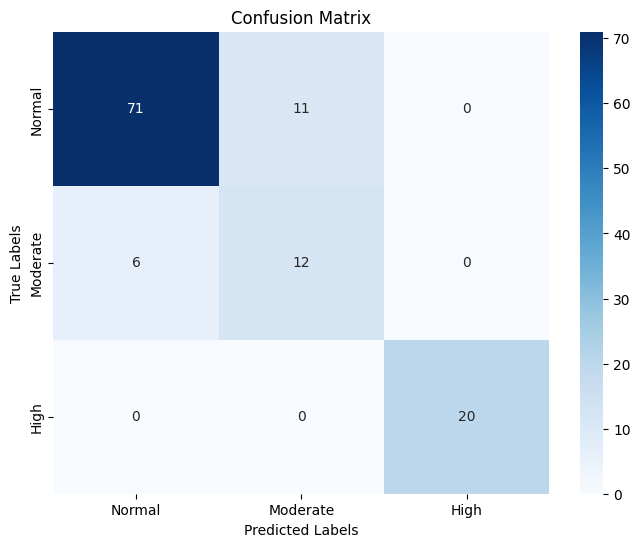

In [25]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal","Moderate",  "High"], yticklabels=["Normal","Moderate", "High"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


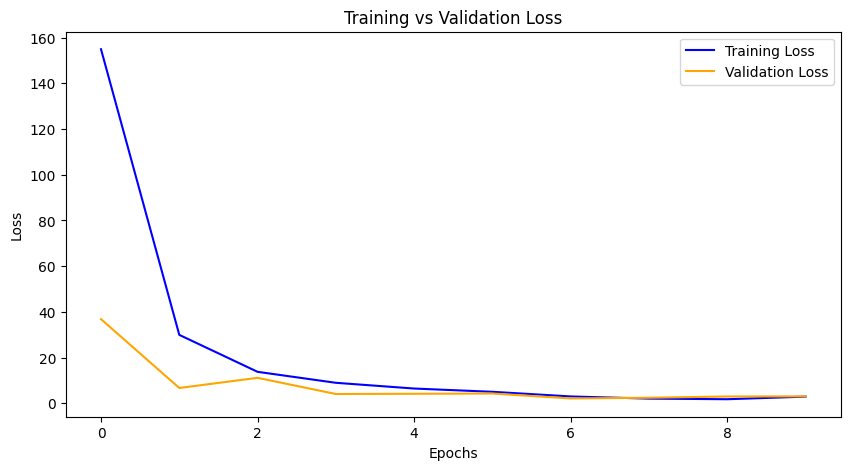

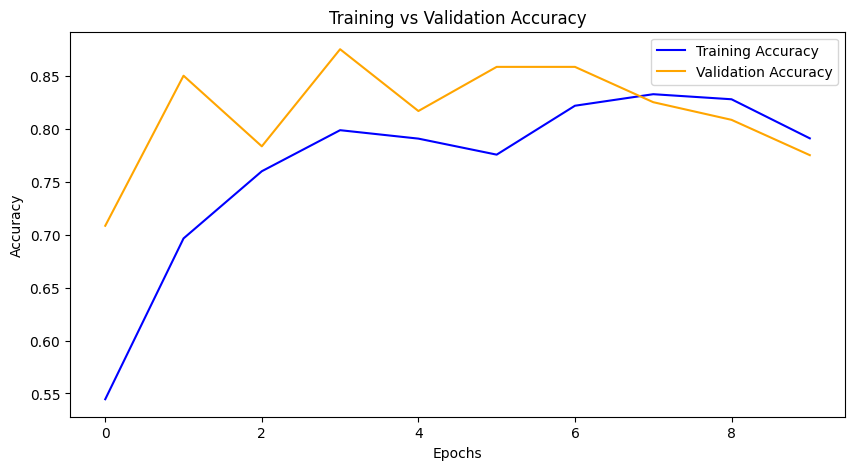

In [26]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()


4/4 [==============================] - 0s 5ms/step


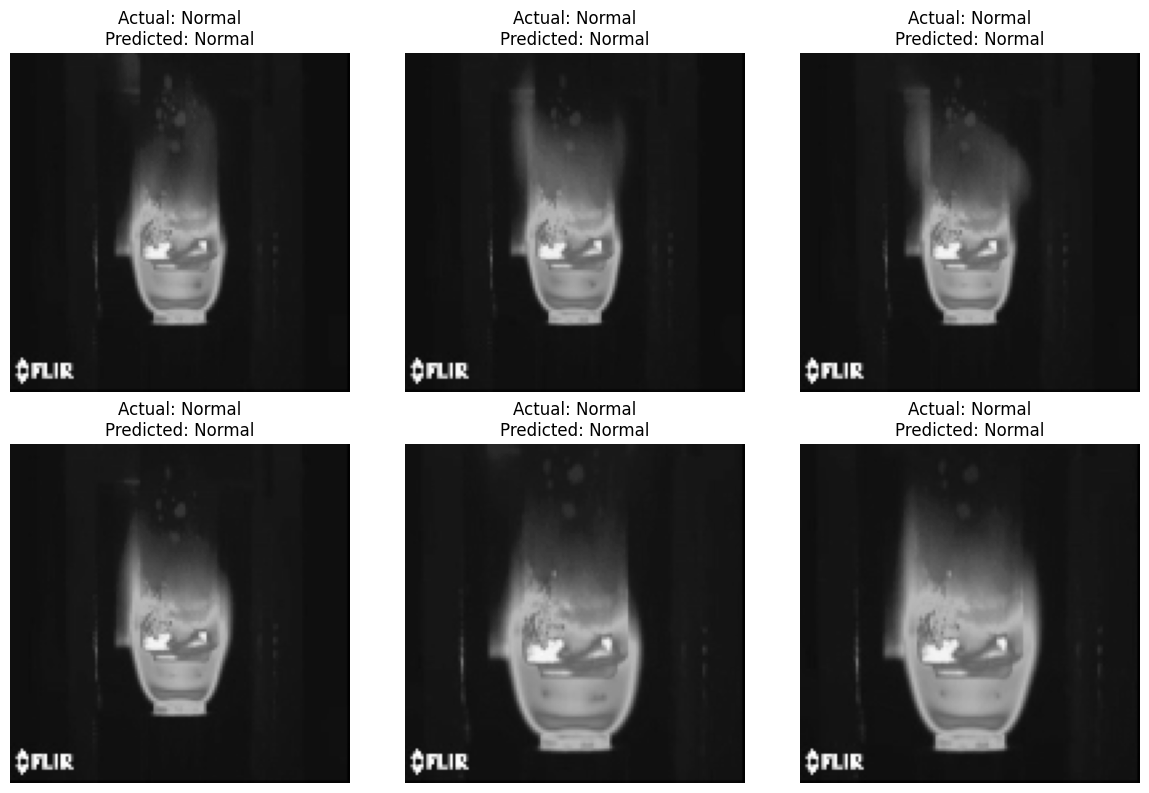

In [27]:
# Predict classes on test images
predictions = np.argmax(model_combined.predict([X_test_combined[:, :128*128], X_test_combined[:, 128*128:]]), axis=1)

# Define class labels
class_labels = ["Normal","Moderate",  "High"]

# Visualize the predictions with actual labels
plt.figure(figsize=(12, 8))
for i in range(6):  # Visualizing the first 6 test images
    plt.subplot(2, 3, i + 1)
    image = X_test_combined[i, :128*128].reshape(128, 128)  # Extract image from combined input
    plt.imshow(image, cmap='gray')
    
    # Fetch actual and predicted labels
    actual_label = class_labels[y_test[i]]
    predicted_label = class_labels[predictions[i]]
    
    # Set title with both labels
    plt.title(f"Actual: {actual_label}\nPredicted: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()
